## Final Project Submission

* Student name: Michael Gatero
* Student pace: Full time
* Instructor name: William Okomba

In [12]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading the csv dataset
df = pd.read_csv("AviationData.csv", encoding="Latin1", low_memory=False)

In [5]:
#setting the default data view and viewing it
pd.set_option("display.max_columns", 500)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
#Checking for columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [34]:
#Droppin the unwanted columns
columns_to_drop = ["Event.Id", "Investigation.Type", "Accident.Number", "Latitude", "Longitude", "Registration.Number", "Airport.Code","Airport.Name", "Schedule", "Report.Status", "Air.carrier", "FAR.Description", "Publication.Date"]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

#Check the remaining columns
print(df.columns)

Index(['Event.Date', 'Location', 'Country', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight'],
      dtype='object')


In [35]:
print(df.dtypes)

Event.Date                 object
Location                   object
Country                    object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
dtype: object


In [36]:
#Changing the contents of the dataset to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.head()

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,1948-10-24,"moose creek, id",united states,fatal(2),destroyed,NaN,stinson,108-3,no,1.0,reciprocating,personal,2.0,0.0,0.0,0.0,unk,cruise
1,1962-07-19,"bridgeport, ca",united states,fatal(4),destroyed,NaN,piper,pa24-180,no,1.0,reciprocating,personal,4.0,0.0,0.0,0.0,unk,unknown
2,1974-08-30,"saltville, va",united states,fatal(3),destroyed,NaN,cessna,172m,no,1.0,reciprocating,personal,3.0,NaN,NaN,NaN,imc,cruise
3,1977-06-19,"eureka, ca",united states,fatal(2),destroyed,NaN,rockwell,112,no,1.0,reciprocating,personal,2.0,0.0,0.0,0.0,imc,cruise
4,1979-08-02,"canton, oh",united states,fatal(1),destroyed,NaN,cessna,501,no,NaN,NaN,personal,1.0,2.0,NaN,0.0,vmc,approach


In [37]:
#checking for null values in the dataset
df.isnull().sum()

Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

In [38]:
#Filling the missing values in the categorical columns with "unknown"
categorical_columns = ["Location", "Country", "Injury.Severity", "Weather.Condition", "Make", "Model", "Engine.Type", 
                       "Purpose.of.flight", "Broad.phase.of.flight", "Aircraft.damage", "Amateur.Built", "Aircraft.Category"]
for col in categorical_columns:
    df[col].fillna("unknown", inplace=True)

In [39]:
#Filling the missing values in the numerical columns with 0
numerical_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
for col in numerical_columns:
    df[col].fillna(0, inplace=True)

In [40]:
#Check if any missing values remain
print(df.isnull().sum())

Event.Date                   0
Location                     0
Country                      0
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category            0
Make                         0
Model                        0
Amateur.Built                0
Number.of.Engines         6084
Engine.Type                  0
Purpose.of.flight            0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Broad.phase.of.flight        0
dtype: int64


In [41]:
#Filling the missing values for 'Number.of.Engines' based on the mode for each 'Make'
df['Number.of.Engines'] = df.groupby('Make')['Number.of.Engines'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))

#Check for any remaining missing values
print(df.isnull().sum())

Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64


In [42]:
#Making the weather condition categories uniform by combining "unk" and "unknown" into a single "Unknown"
df['Weather.Condition'] = df['Weather.Condition'].replace({'unk': 'unknown'})

In [43]:
#Checking for duplicate rows
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

#Display duplicate rows
print(df[df.duplicated()])

Number of duplicate rows: 35
       Event.Date          Location         Country Injury.Severity  \
1371   1982-05-28    evansville, in   united states       non-fatal   
3082   1982-10-18    gulf of mexico  gulf of mexico        fatal(3)   
4761   1983-05-22    bridgeport, ca   united states        fatal(1)   
7941   1984-04-13        deland, fl   united states       non-fatal   
8661   1984-06-18      portland, ar   united states       non-fatal   
13532  1985-11-30     san pedro, ca   united states        fatal(1)   
19820  1988-03-10    greensboro, nc   united states        incident   
21077  1988-08-05       atlanta, ga   united states        incident   
22453  1989-03-01       houston, tx   united states        incident   
24878  1990-02-09     teterboro, nj   united states       non-fatal   
26868  1990-10-20          kent, oh   united states       non-fatal   
27496  1991-03-02        marana, az   united states       non-fatal   
27811  1991-04-19    santa rosa, nm   united sta

In [44]:
#Drop the duplicates
df = df.drop_duplicates()

#Confirm the duplicated rows are removed
df.duplicated().sum().any()

False

In [46]:
#Showing the shape of the dataset
df.shape

(88854, 18)

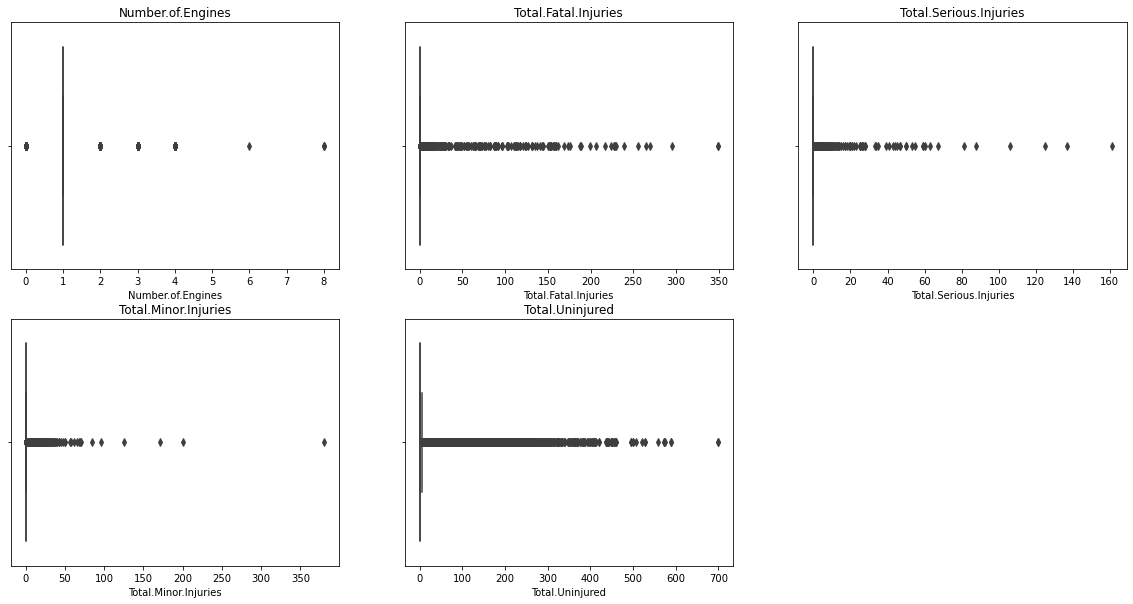

In [7]:
#Checking outliers
#First select numerical columns
numerical_columns = ["Number.of.Engines", "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]
#Plot boxplots for each numerical column
plt.figure(figsize=(20, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(column);

In [48]:
#Saving the clean dataset
df.to_csv("Clean_Aviation_Data.csv", index=False)

In [5]:
#Reading the new data
data = pd.read_csv("Clean_Aviation_Data.csv")
data

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,1948-10-24,"moose creek, id",united states,fatal(2),destroyed,unknown,stinson,108-3,no,1.0,reciprocating,personal,2.0,0.0,0.0,0.0,unknown,cruise
1,1962-07-19,"bridgeport, ca",united states,fatal(4),destroyed,unknown,piper,pa24-180,no,1.0,reciprocating,personal,4.0,0.0,0.0,0.0,unknown,unknown
2,1974-08-30,"saltville, va",united states,fatal(3),destroyed,unknown,cessna,172m,no,1.0,reciprocating,personal,3.0,0.0,0.0,0.0,imc,cruise
3,1977-06-19,"eureka, ca",united states,fatal(2),destroyed,unknown,rockwell,112,no,1.0,reciprocating,personal,2.0,0.0,0.0,0.0,imc,cruise
4,1979-08-02,"canton, oh",united states,fatal(1),destroyed,unknown,cessna,501,no,1.0,unknown,personal,1.0,2.0,0.0,0.0,vmc,approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88849,2022-12-26,"annapolis, md",united states,minor,unknown,unknown,piper,pa-28-151,no,1.0,unknown,personal,0.0,1.0,0.0,0.0,unknown,unknown
88850,2022-12-26,"hampton, nh",united states,unknown,unknown,unknown,bellanca,7eca,no,1.0,unknown,unknown,0.0,0.0,0.0,0.0,unknown,unknown
88851,2022-12-26,"payson, az",united states,non-fatal,substantial,airplane,american champion aircraft,8gcbc,no,1.0,unknown,personal,0.0,0.0,0.0,1.0,vmc,unknown
88852,2022-12-26,"morgan, ut",united states,unknown,unknown,unknown,cessna,210n,no,1.0,unknown,personal,0.0,0.0,0.0,0.0,unknown,unknown


In [6]:
#Copying the new data
data1 = data.copy(deep=True)

In [10]:
#A summary for numerical columns
print(data1.describe())

       Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       88854.000000          88854.000000            88854.000000   
mean            1.146487              0.564724                0.240507   
std             0.465134              5.127606                1.434820   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          88854.000000     88854.000000  
mean               0.309136         4.964549  
std                2.083992        26.980768  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         1.000000  
75% 

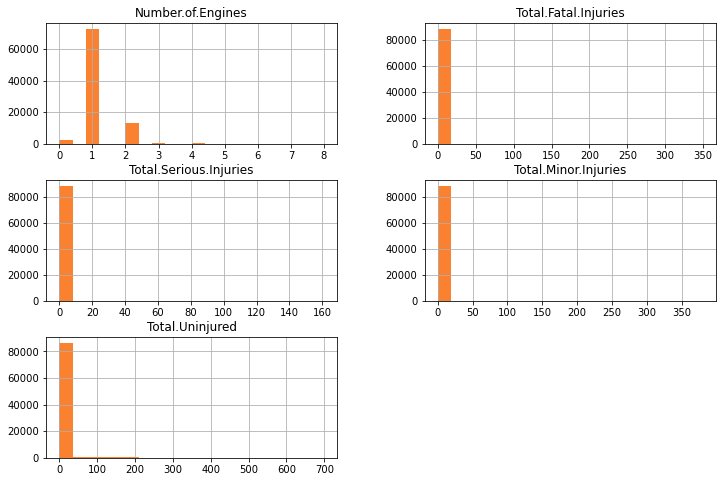

In [11]:
#Histogram for numerical columns
numerical_columns = ["Number.of.Engines", "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]
data1[numerical_columns].hist(figsize=(12, 8), bins=20, color="#FA812F");

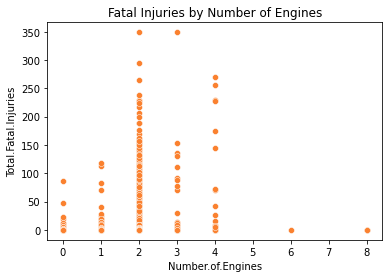

In [27]:
#A scatter plot showing the relation between the number of engines and the total fatal injuries
sns.scatterplot(x="Number.of.Engines", y="Total.Fatal.Injuries", data=data1, color="#FA812F")
plt.title("Fatal Injuries by Number of Engines");

Conclusion
- This shows that Aircrafts with 0, 2 and 4 engines have recorded the highest number of fatal injuries.
- Aircrafts with 1 and 3 engines have few numbers of fatal injuries.
- Aircrafts with 6 and 8 engines have zero fatal injuries meaning they are safe.

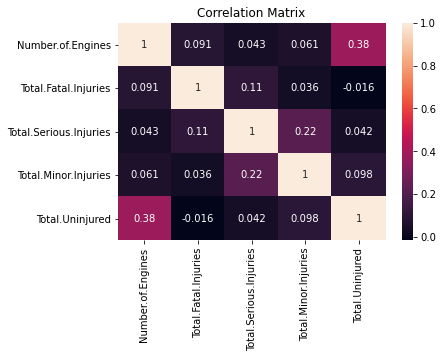

In [28]:
# Correlation matrix of number of engines to the total injuries
corr_matrix = data1[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, color="#FA812F")
plt.title('Correlation Matrix');

- The matrix suggests that the number of engines has a modest positive relationship with the number of uninjured individuals, implying that multi-engine aircraft might provide better safety outcomes. 
- However, the number of engines does not significantly correlate with the likelihood or severity of injuries.

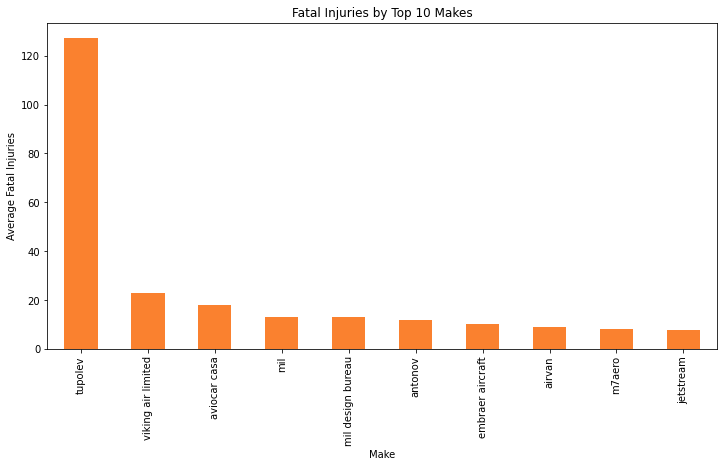

In [29]:
#A bar plot to show the top 10 makes with the highest average fatal injuries
avg_fatalities_by_make = data1.groupby("Make")["Total.Fatal.Injuries"].mean().sort_values(ascending=False)
avg_fatalities_by_make[:10].plot(kind="bar", figsize=(12, 6), color="#FA812F")
plt.title("Fatal Injuries by Top 10 Makes")
plt.ylabel("Average Fatal Injuries");

In [30]:
data1.columns

Index(['Event.Date', 'Location', 'Country', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight'],
      dtype='object')

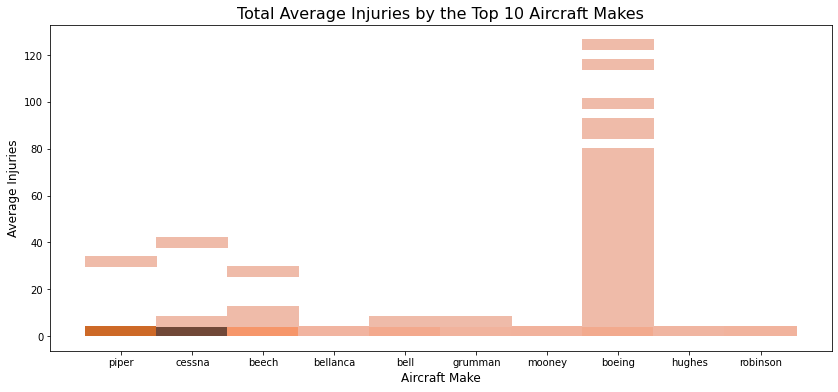

In [31]:
#Calculate the average of the three injury columns for each row
average_injuries = ((data1["Total.Fatal.Injuries"] + data1["Total.Serious.Injuries"] + data1["Total.Minor.Injuries"]) / 3)

#Take the top 10 makes by count for faster plotting
top_makes = data1["Make"].value_counts().head(10).index
subset_data = data1[data1["Make"].isin(top_makes)]

#Calculate the average injuries for the subset
average_injuries_subset = ((subset_data["Total.Fatal.Injuries"] + subset_data["Total.Serious.Injuries"] + subset_data["Total.Minor.Injuries"]) / 3)

#Plotting the histogram with a smaller dataset for the code to run
plt.figure(figsize=(14, 6))
sns.histplot( x=subset_data["Make"], y=average_injuries_subset, bins=30, kde=False, color="#FA812F")

plt.title("Total Average Injuries by the Top 10 Aircraft Makes", fontsize=16)
plt.xlabel("Aircraft Make", fontsize=12)
plt.ylabel("Average Injuries", fontsize=12);

- The chart reveals that Boeing has the highest average injuries among the top 10 aircraft manufacturers, far surpassing others.

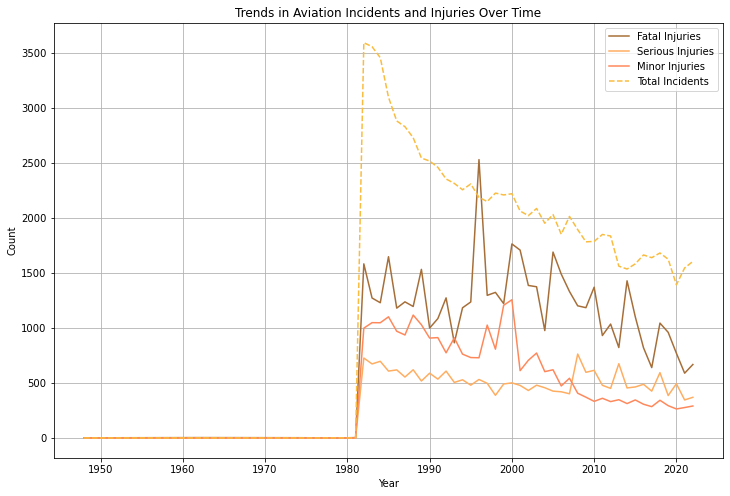

In [32]:
#First Convert the "Event.Date" column to datetime for time trend analysis
data1["Event.Date"] = pd.to_datetime(data1["Event.Date"], errors="coerce")

#Extracting the year from the date for aggregation
data1["Year"] = data1["Event.Date"].dt.year

#Group data by year and calculate the total injuries (fatal, serious, minor) and incidents
time_trends = data1.groupby("Year").agg({"Total.Fatal.Injuries": "sum", "Total.Serious.Injuries": "sum", "Total.Minor.Injuries": "sum", "Total.Uninjured": "sum", "Event.Date": "count"}).rename(columns={"Event.Date": "Total.Incidents"}).reset_index()

#Remove rows with null years or zero incidents for better analysis
time_trends = time_trends[time_trends["Year"].notnull() & (time_trends["Total.Incidents"] > 0)]

#Plot the trends
plt.figure(figsize=(12, 8))
plt.plot(time_trends["Year"], time_trends["Total.Fatal.Injuries"], label="Fatal Injuries", color="#A66E38")
plt.plot(time_trends["Year"], time_trends["Total.Serious.Injuries"], label="Serious Injuries", color="#FFAD60")
plt.plot(time_trends["Year"], time_trends["Total.Minor.Injuries"], label="Minor Injuries", color="#FF885B")
plt.plot(time_trends["Year"], time_trends["Total.Incidents"], label="Total Incidents", color="#FABC3F", linestyle="--")

plt.title("Trends in Aviation Incidents and Injuries Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True);

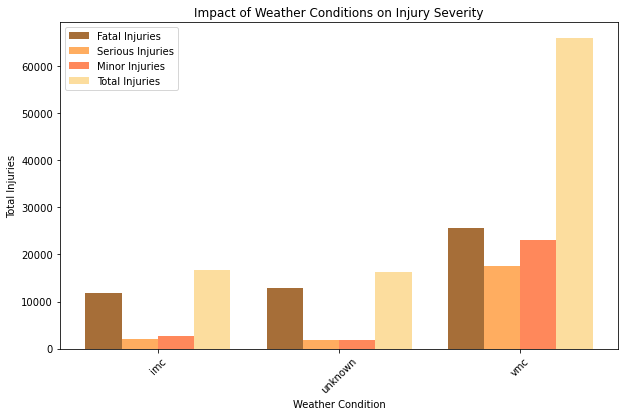

In [33]:
#Group the data by Weather.Condition and sum the injuries for each condition
weather_injury_analysis = data1.groupby("Weather.Condition").agg({"Total.Fatal.Injuries": "sum", "Total.Serious.Injuries": "sum", "Total.Minor.Injuries": "sum", "Total.Uninjured": "sum"}).reset_index()

#Create a new column for total injuries(Engineering)
weather_injury_analysis["Total.Injuries"] = (weather_injury_analysis["Total.Fatal.Injuries"] + weather_injury_analysis["Total.Serious.Injuries"] + weather_injury_analysis["Total.Minor.Injuries"])

#Plotting the impact of weather conditions on injury severity
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(weather_injury_analysis))

#Plotting (Fatal, Serious, Minor, and Total Injuries) columns for each weather condition
plt.bar(index, weather_injury_analysis["Total.Fatal.Injuries"], width=bar_width, label="Fatal Injuries", color="#A66E38")
plt.bar([i + bar_width for i in index], weather_injury_analysis["Total.Serious.Injuries"], width=bar_width, label="Serious Injuries", color="#FFAD60")
plt.bar([i + 2 * bar_width for i in index], weather_injury_analysis["Total.Minor.Injuries"], width=bar_width, label="Minor Injuries", color="#FF885B")
plt.bar([i + 3 * bar_width for i in index], weather_injury_analysis["Total.Injuries"], width=bar_width, label="Total Injuries", color="#FABC3F", alpha=0.5)

plt.title("Impact of Weather Conditions on Injury Severity")
plt.xlabel("Weather Condition")
plt.ylabel("Total Injuries")
plt.xticks([i + 1.5 * bar_width for i in index], weather_injury_analysis["Weather.Condition"], rotation=45)
plt.legend();

- This shows us that most accidents happenned during vmc(Visual Meteorological Conditions) whereby the weather was condusive.
- The aircraft to be purchased should be able to fly under IMC(Instrument Meteorological Conditions).